In [0]:
pip install scikit-image

In [0]:
pip install localization

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [0]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import localization as localization
import numpy as np
from skimage.transform import resize
import pytesseract
from PIL import Image
import pandas as pd
import requests
from io import BytesIO
from urllib.request import urlopen
from imageio import imread
import cv2
from google.colab.patches import cv2_imshow

(177, 284)


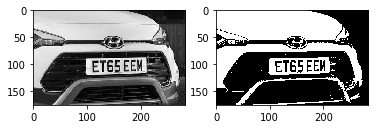

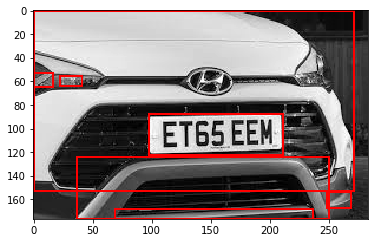

In [194]:
car_image = imread("/content/download (1).jpg",as_gray=True)
# it should be a 2 dimensional array
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image, cmap="gray")
plt.show()

# this gets all the connected regions and groups them together
label_image = measure.label(binary_car_image)
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray");


# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    if region.area < 50:
        #if the region is so small then it's likely not a license plate
        continue

    # the bounding box coordinates
    minRow, minCol, maxRow, maxCol = region.bbox
    rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rectBorder)
    #plt.axis([min_col, max_col,max_row, min_row])
    #ax1.axis('off')
    
    # let's draw a red rectangle over those regions

plt.show()

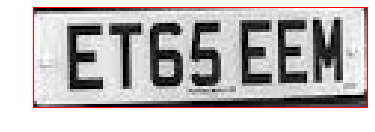

ET65 EEM


In [195]:
# this gets all the connected regions and groups them together
label_image = measure.label(binary_car_image)

# getting the maximum width, height and minimum width and height that a license plate can be
plate_dimensions = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray");

# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    if region.area < 50:
        #if the region is so small then it's likely not a license plate
        continue

    # the bounding box coordinates
    min_row, min_col, max_row, max_col = region.bbox
    region_height = max_row - min_row
    region_width = max_col - min_col
    # ensuring that the region identified satisfies the condition of a typical license plate
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
        plate_like_objects.append(binary_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                              max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col-min_col, max_row-min_row, edgecolor="red", linewidth=2, fill=False)
        ax1.add_patch(rectBorder)
        plt.axis([min_col, max_col,max_row, min_row])
        ax1.axis('off')
        plt.savefig('temp.jpg')
    # let's draw a red rectangle over those regions

plt.show()

text = pytesseract.image_to_string(Image.open("temp.jpg"),lang='eng')   
print(text) 




In [193]:
src_path ='temp.jpg'#/content/sample_data---/content/temp.jpg
(src_path)
def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite(src_path + "removed_noise.png", img)

    #  Apply threshold to get image with only black and white
    #img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    # Write the image after apply opencv to do some ...
    cv2.imwrite(src_path + "thres.png", img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(Image.open(src_path + "thres.png"))

    # Remove template file
    #os.remove(temp)
    return result
  
values=get_string(src_path)
for i in values:
  if((i>='a' and i<='z') or (i>='A' and i<='Z' ) or (i>='0' and i<='9')):
     print(i,end="")


temp.jpg
DL7C01939

In [0]:
from google.colab import drive
drive.mount('/content/drive')